In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Function to map character to keyboard row number
def row_number(char):
    rows = ['1234567890', 'QWERTYUIOP', 'ASDFGHJKL', 'ZXCVBNM']
    for i, row in enumerate(rows):
        if char.upper() in row:
            return i + 1
    return 0

# Function to map character to keyboard column number
def column_number(char):
    rows = ['1234567890', 'QWERTYUIOP', 'ASDFGHJKL', 'ZXCVBNM']
    for i, row in enumerate(rows):
        if char.upper() in row:
            return row.index(char.upper()) + 1
    return 0

# Load your data from a CSV file (replace 'your_output_file.csv' with the actual file path)
text_file_path = 'your_output_file.csv'
data = pd.read_csv(text_file_path, delimiter=',')
df = data.head(10000)  # Limit the number of rows for this example

# Preprocessing function based on the provided guidelines
def preprocess_data(df):
    # Check for missing values in the 'password' column
    if df[' password'].isnull().any():
        # Handle missing values, e.g., fill them with a placeholder
        df[' password'].fillna('MISSING', inplace=True)

    # Extract PII tags from passwords and replace them with placeholders
    df['password'] = df[' password'].str.replace(r'PII\d+', 'PII_TAG')

    # Create features for Random Forest
    df['PII_Type'] = df['password'].apply(lambda x: 'PII_TAG' if 'PII_TAG' in x else 'CHARACTER')
    df['PII_Serial_Number'] = df['password'].apply(lambda x: int(x.split('PII_TAG')[1]) if 'PII_TAG' in x else 0)
    df['Char_Type'] = df['password'].apply(lambda x: x[0] if 'PII_TAG' not in x else 'PII_TAG')
    df['Char_Rank'] = df['password'].apply(lambda x: ord(x[0]) - ord('A') if 'PII_TAG' not in x else 0)
    df['Keyboard_Row'] = df['password'].apply(lambda x: 0 if 'PII_TAG' in x else row_number(x[0]))
    df['Keyboard_Column'] = df['password'].apply(lambda x: 0 if 'PII_TAG' in x else column_number(x[0]))

    return df

# Preprocess the data
df = preprocess_data(df)

# Split the dataset into features (X) and target (Y)
X = df[['PII_Type', 'PII_Serial_Number', 'Char_Type', 'Char_Rank', 'Keyboard_Row', 'Keyboard_Column']]
Y = df['password']

# Encode categorical features
label_encoder = LabelEncoder()
X['PII_Type'] = label_encoder.fit_transform(X['PII_Type'])

# Encode 'Char_Type' separately because it might have unseen labels in test data
X['Char_Type'] = label_encoder.fit_transform(X['Char_Type'])
# Make sure 'CHARACTER' is included in the encoded labels
if 'CHARACTER' not in label_encoder.classes_:
    label_encoder.classes_ = np.append(label_encoder.classes_, 'CHARACTER')

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Example: Predict password for a new user with PII
new_user = pd.DataFrame({
    'PII_Type': ['CHARACTER'],  # Example: 'CHARACTER'
    'PII_Serial_Number': [0],   # Example: 0
    'Char_Type': ['P'],         # Example: 'P'
    'Char_Rank': [15],          # Example: 15
    'Keyboard_Row': [3],        # Example: 3 (Row of 'P' on a QWERTY keyboard)
    'Keyboard_Column': [7]      # Example: 7 (Column of 'P' on a QWERTY keyboard)
})

# Encode 'PII_Type' and 'Char_Type' in new_user
new_user['PII_Type'] = label_encoder.transform(new_user['PII_Type'])
new_user['Char_Type'] = label_encoder.transform(new_user['Char_Type'])

predicted_password = clf.predict(new_user)
print(f"Predicted Password: {predicted_password[0]}")


<ipython-input-3-7236ed6543a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' password'].fillna('MISSING', inplace=True)
<ipython-input-3-7236ed6543a7>:41: FutureWarning: The default value of regex will change from True to False in a future version.
  df['password'] = df[' password'].str.replace(r'PII\d+', 'PII_TAG')
<ipython-input-3-7236ed6543a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['password'] = df[' password'].str.replace(r'PII\d+', 'PII_TAG')
<ipython-input-3-7236ed6543a7>:44: SettingWithCopyWarning: 
A value is trying to be set on a c

Accuracy: 3.60%
Predicted Password: Unicorn123


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np


# Function to map character to keyboard row number
def row_number(char):
    rows = ['1234567890', 'QWERTYUIOP', 'ASDFGHJKL', 'ZXCVBNM']
    for i, row in enumerate(rows):
        if char.upper() in row:
            return i + 1
    return 0

# Function to map character to keyboard column number
def column_number(char):
    rows = ['1234567890', 'QWERTYUIOP', 'ASDFGHJKL', 'ZXCVBNM']
    for i, row in enumerate(rows):
        if char.upper() in row:
            return row.index(char.upper()) + 1
    return 0

# Load your data from a CSV file (replace 'your_output_file.csv' with the actual file path)
text_file_path = 'your_output_file.csv'
data = pd.read_csv(text_file_path, delimiter=',')
df = data.head(20000)  # Limit the number of rows for this example

# Preprocessing function based on the provided guidelines
def preprocess_data(df):
    # Check for missing values in the 'password' column
    if df[' password'].isnull().any():
        # Handle missing values, e.g., fill them with a placeholder
        df[' password'].fillna('MISSING', inplace=True)

    # Extract PII tags from passwords and replace them with placeholders
    df['password'] = df[' password'].str.replace(r'PII\d+', 'PII_TAG')

    # Create features for Random Forest
    df['PII_Type'] = df['password'].apply(lambda x: 'PII_TAG' if 'PII_TAG' in x else 'CHARACTER')
    df['PII_Serial_Number'] = df['password'].apply(lambda x: int(x.split('PII_TAG')[1]) if 'PII_TAG' in x else 0)
    df['Char_Type'] = df['password'].apply(lambda x: x[0] if 'PII_TAG' not in x else 'PII_TAG')
    df['Char_Rank'] = df['password'].apply(lambda x: ord(x[0]) - ord('A') if 'PII_TAG' not in x else 0)
    df['Keyboard_Row'] = df['password'].apply(lambda x: 0 if 'PII_TAG' in x else row_number(x[0]))
    df['Keyboard_Column'] = df['password'].apply(lambda x: 0 if 'PII_TAG' in x else column_number(x[0]))

    return df

# Preprocess the data
df = preprocess_data(df)

# Split the dataset into features (X) and target (Y)
X = df[['PII_Type', 'PII_Serial_Number', 'Char_Type', 'Char_Rank', 'Keyboard_Row', 'Keyboard_Column']]
Y = df['password']

# Encode categorical features
label_encoder = LabelEncoder()
X['PII_Type'] = label_encoder.fit_transform(X['PII_Type'])

# Encode 'Char_Type' separately because it might have unseen labels in test data
X['Char_Type'] = label_encoder.fit_transform(X['Char_Type'])
# Make sure 'CHARACTER' is included in the encoded labels
if 'CHARACTER' not in label_encoder.classes_:
    label_encoder.classes_ = np.append(label_encoder.classes_, 'CHARACTER')

## Number of prediction rounds
num_rounds = 5
best_accuracy = 0
data_fraction = 0.2  # Starting fraction of the data

for round in range(1, num_rounds + 1):
    print(f"Round {round}:")

    # Calculate the number of rows to use for this round
    num_rows = int(len(X) * data_fraction)

    # Split the data into training and validation sets for this round
    X_train, X_valid, Y_train, Y_valid = train_test_split(X[:num_rows], Y[:num_rows], test_size=0.2, random_state=round)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=236, random_state=42)
    clf.fit(X_train, Y_train)

    # Make predictions on the validation set
    Y_pred = clf.predict(X_valid)

    # Evaluate the model
    accuracy = accuracy_score(Y_valid, Y_pred)
    print(f"Validation Accuracy: {accuracy:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf

    # Increase data fraction for the next round
    data_fraction += 0.1

# Example: Predict password for a new user with PII
new_user = pd.DataFrame({
    'PII_Type': ['CHARACTER'],  # Example: 'CHARACTER'
    'PII_Serial_Number': [0],   # Example: 0
    'Char_Type': ['P'],         # Example: 'P'
    'Char_Rank': [15],          # Example: 15
    'Keyboard_Row': [3],        # Example: 3 (Row of 'P' on a QWERTY keyboard)
    'Keyboard_Column': [7]      # Example: 7 (Column of 'P' on a QWERTY keyboard)
})

# Encode 'PII_Type' and 'Char_Type' in new_user
new_user['PII_Type'] = label_encoder.transform(new_user['PII_Type'])
new_user['Char_Type'] = label_encoder.transform(new_user['Char_Type'])

predicted_password = best_model.predict(new_user)
print(f"Predicted Password: {predicted_password[0]}")
print(f"Best Validation Accuracy: {best_accuracy * 100:.2f}%")


<ipython-input-1-7e38370ad130>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' password'].fillna('MISSING', inplace=True)
<ipython-input-1-7e38370ad130>:38: FutureWarning: The default value of regex will change from True to False in a future version.
  df['password'] = df[' password'].str.replace(r'PII\d+', 'PII_TAG')
<ipython-input-1-7e38370ad130>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['password'] = df[' password'].str.replace(r'PII\d+', 'PII_TAG')
<ipython-input-1-7e38370ad130>:41: SettingWithCopyWarning: 
A value is trying to be set on a c

Round 1:
Validation Accuracy: 2.75%
Round 2:
Validation Accuracy: 3.17%
Round 3:
Validation Accuracy: 3.12%
Round 4:
Validation Accuracy: 3.10%
Round 5:
Validation Accuracy: 3.33%
Predicted Password: Underarmour!
Best Validation Accuracy: 3.33%


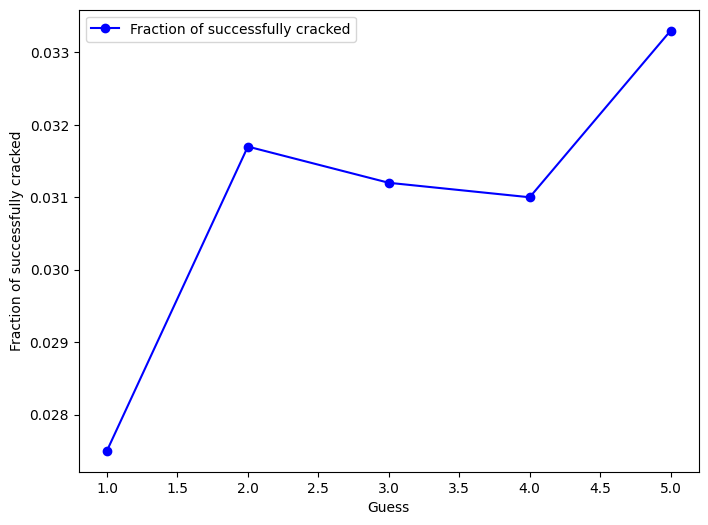

In [7]:
import matplotlib.pyplot as plt
rounds = list(range(1, num_rounds + 1))
validation_accuracy = [2.75, 3.17, 3.12, 3.10, 3.33]
validation_accuracy = [acc / 100 for acc in validation_accuracy]
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

plt.plot(rounds, validation_accuracy, marker='o', linestyle='-', color='b', label='Fraction of successfully cracked')

# plt.title('Validation Accuracy vs. Rounds/Epochs')
plt.xlabel('Guess')
plt.ylabel('Fraction of successfully cracked')
# plt.grid(True)
plt.legend()

plt.show()
